# What are the most demanded skills for the top 3 most popular data roles?

### Methodology
 1. Clean-up skill column
 2. Calculate skill count based on job_title_short
 3. Calculate skill percentage
 4. Plot final findings

In [3]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

/Users/aref/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [5]:
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [6]:
df_skills = df.explode('job_skills')
df_skills

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kafka,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,kubernetes,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,docker,"{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,aws,"{'cloud': ['aws'], 'other': ['flow']}"


In [7]:
df_skills[['job_title_short', 'job_skills']]

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,r
1,Data Analyst,python
1,Data Analyst,sql
1,Data Analyst,nosql
...,...,...
785739,Data Engineer,kafka
785739,Data Engineer,kubernetes
785739,Data Engineer,docker
785740,Software Engineer,aws


### Count Skills per Job Title

In [8]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()
df_skills_count

job_skills  job_title_short          
airflow     Business Analyst               318
            Cloud Engineer                 260
            Data Analyst                  2002
            Data Engineer                25505
            Data Scientist                3915
                                         ...  
zoom        Machine Learning Engineer       46
            Senior Data Analyst             86
            Senior Data Engineer           122
            Senior Data Scientist           79
            Software Engineer              229
Length: 2256, dtype: int64

In [9]:
df_skills_count = df_skills_count.reset_index(name = 'skill_count')
df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,318
1,airflow,Cloud Engineer,260
2,airflow,Data Analyst,2002
3,airflow,Data Engineer,25505
4,airflow,Data Scientist,3915
...,...,...,...
2251,zoom,Machine Learning Engineer,46
2252,zoom,Senior Data Analyst,86
2253,zoom,Senior Data Engineer,122
2254,zoom,Senior Data Scientist,79


In [13]:
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


In [16]:
df_skills_count.sort_values(by = 'skill_count', ascending = False)

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
541,elixir,Senior Data Analyst,1
2225,wsl,Senior Data Analyst,1
554,esquisse,Data Analyst,1
577,f#,Cloud Engineer,1


## Create List of 3 Top Roles

### Focus: Data Analysts, Data Engineers, and Data Scientists

In [22]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles

['Data Scientist',
 'Data Engineer',
 'Data Analyst',
 'Senior Data Engineer',
 'Senior Data Scientist',
 'Senior Data Analyst',
 'Business Analyst',
 'Software Engineer',
 'Machine Learning Engineer',
 'Cloud Engineer']

In [26]:
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

## Plot Skills Counts

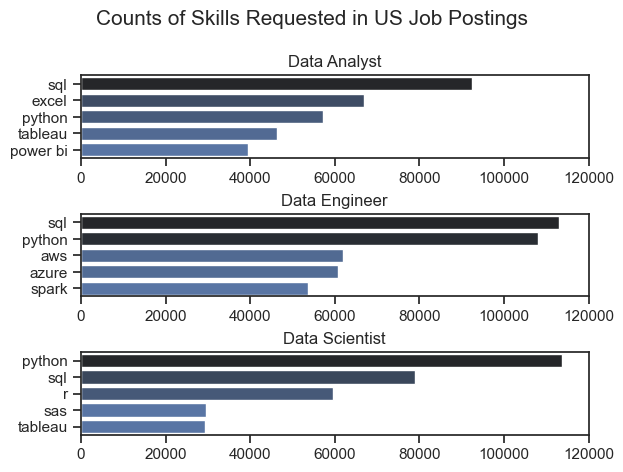

In [56]:
fig, ax = plt.subplots(len(job_titles), 1)

sns.set_theme(style = 'ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    sns.barplot(data = df_plot, x = 'skill_count', y = 'job_skills', ax = ax[i], hue = 'skill_count', palette = 'dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 120000)

fig.suptitle('Counts of Skills Requested in US Job Postings', fontsize = 15)
fig.tight_layout(h_pad = 0.5)
plt.show()
    



### Convert Counts to Percentages